<a href="https://colab.research.google.com/github/abdullahrana06/Telco-Customer-Churn-Prediction/blob/main/Telco_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (2).csv


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best model: Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  StandardScaler(with_mean=False),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                         

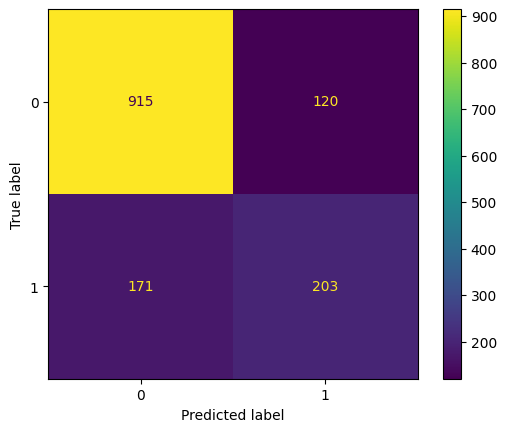

Pipeline + results saved.


In [ ]:
# Install + imports
!pip -q install pandas scikit-learn joblib matplotlib
import pandas as pd, numpy as np, matplotlib.pyplot as plt, joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Load data
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
target_col = 'Churn' if 'Churn' in df.columns else 'churn'
y = df[target_col].astype(str)
X = df.drop(columns=[target_col])
X = X.drop(columns=[c for c in X.columns if 'customer' in c.lower() or 'id' in c.lower()], errors='ignore')

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
num_cols, cat_cols = X_train.select_dtypes(include=[np.number]).columns.tolist(), X_train.select_dtypes(exclude=[np.number]).columns.tolist()

# Pipeline + grid
preproc = ColumnTransformer([("num", StandardScaler(with_mean=False), num_cols),("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)])
pipe = Pipeline([("pre", preproc),("clf", LogisticRegression(max_iter=2000))])
param_grid = [{"clf": [LogisticRegression(max_iter=2000)],"clf__C": [0.1, 1, 10]},{"clf": [RandomForestClassifier(random_state=42)],"clf__n_estimators": [200, 400],"clf__max_depth": [None, 10, 20]}]
grid = GridSearchCV(pipe, param_grid=param_grid, scoring="f1_macro", cv=5, n_jobs=-1, verbose=1).fit(X_train, y_train)
print("Best model:", grid.best_estimator_)

# Evaluate
pred = grid.predict(X_test)
print(classification_report(y_test, pred))
if hasattr(grid, "predict_proba"):
    try:
        proba = grid.predict_proba(X_test)
        y_pos = (y_test == list(grid.best_estimator_.classes_)[1]).astype(int)
        print("ROC AUC:", roc_auc_score(y_pos, proba[:,1]))
    except: pass
ConfusionMatrixDisplay(confusion_matrix(y_test, pred)).plot(); plt.show()

# Save
joblib.dump(grid.best_estimator_, "churn_pipeline.joblib")
with open("results.txt", "w") as f: f.write(classification_report(y_test, pred))
print("Pipeline + results saved.")

In [17]:
from google.colab import files
files.download("Telco Customer Churn Prediction.ipynb")

FileNotFoundError: Cannot find file: Telco Customer Churn Prediction.ipynb

In [18]:
from google.colab import files

# To download the notebook file, you need to specify the correct filename.
# You can find the filename by looking at the tab title of your notebook.
# For example, if the tab title is "MyNotebook.ipynb", you would use:
# files.download("MyNotebook.ipynb")

# Assuming the notebook is named "Telco Customer Churn Prediction.ipynb" as in your original code:
try:
  files.download("Telco Customer Churn Prediction.ipynb")
except FileNotFoundError:
  print("Error: 'Telco Customer Churn Prediction.ipynb' not found. Please check the notebook tab title for the correct filename.")

Error: 'Telco Customer Churn Prediction.ipynb' not found. Please check the notebook tab title for the correct filename.
